In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

warnings.filterwarnings('ignore')
%matplotlib inline

In [30]:
df=pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [31]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [32]:
df.shape

(8807, 12)

In [33]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [35]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [36]:
df.isnull().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [37]:
round(df.isnull().sum()/df.shape[0]*100,2).sort_values(ascending=False)

director        29.91
country          9.44
cast             9.37
date_added       0.11
rating           0.05
duration         0.03
show_id          0.00
type             0.00
title            0.00
release_year     0.00
listed_in        0.00
description      0.00
dtype: float64

In [38]:
df["country"].value_counts()

country
United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64

In [39]:
netflix_shows=df[df['type']=='TV Show']
display(netflix_shows)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


In [40]:
netflix_movies=df[df['type']=='Movie']
display(netflix_movies)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [41]:


# Paleta de cores "Colorblind"
colors = ['#1f78b4', '#33a02c']

fig = go.Figure(data=[go.Pie(labels=df['type'].value_counts().index, 
                             values=df['type'].value_counts().values,
                             hole=0.5,
                             title='filmes vs series',
                             marker=dict(colors=colors))])

fig.show()


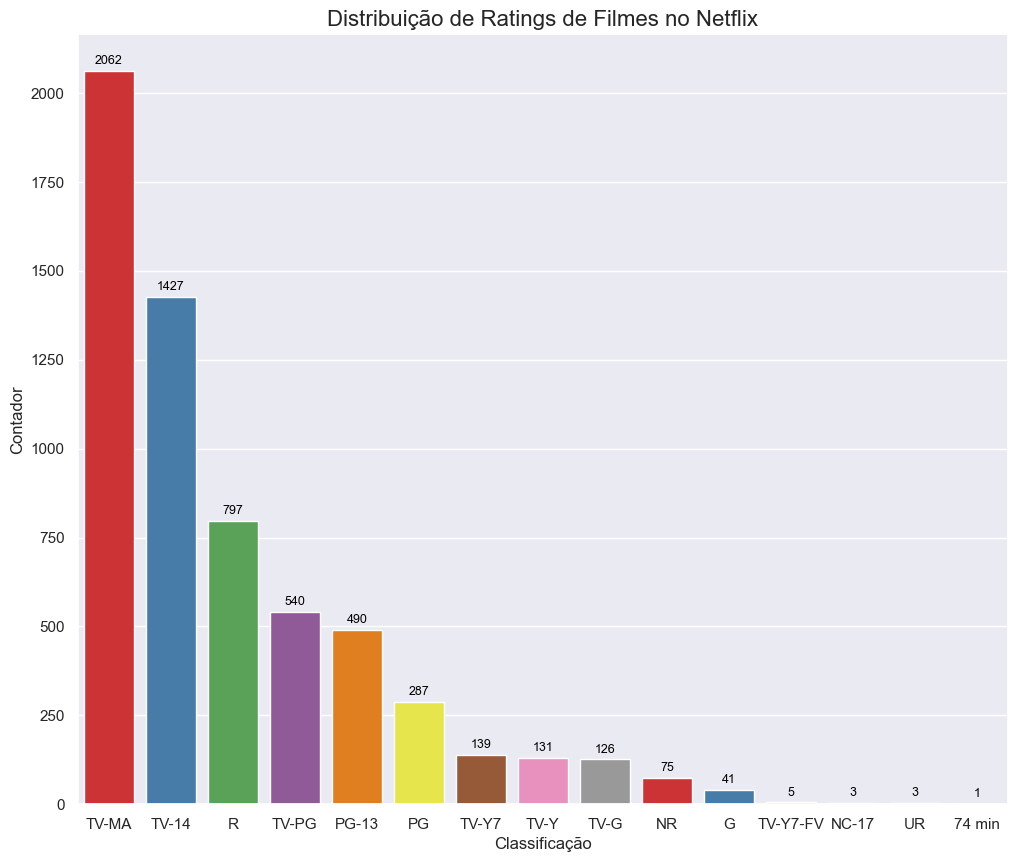

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd



# Configurar o estilo do Seaborn
sns.set(style="darkgrid")

# Criar o gráfico de contagem
plt.figure(figsize=(12, 10))
ax = sns.countplot(x="rating", data=netflix_movies, palette="Set1", order=netflix_movies['rating'].value_counts().index[0:15])

# Adicionar números do contador acima de cada coluna
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=9, color='black', xytext=(0, 5), textcoords='offset points')

# Adicionar título ao gráfico
ax.set_title('Distribuição de Ratings de Filmes no Netflix', fontsize=16)
plt.xlabel("Classificação")
plt.ylabel("Contador")

plt.show()


In [43]:
imdb_ratings=pd.read_csv('IMDb ratings.csv',usecols=['weighted_average_vote'])
imdb_titles=pd.read_csv('IMDb movies.csv', usecols=['title','year','genre'])
ratings = pd.DataFrame({'Title':imdb_titles.title,
                    'Release Year':imdb_titles.year,
                    'Rating': imdb_ratings.weighted_average_vote,
                    'Genre':imdb_titles.genre})
ratings.drop_duplicates(subset=['Title','Release Year','Rating'], inplace=True)
ratings.shape
display(ratings)

,Title,Release Year,Rating,Genre
0,Miss Jerry,1894,5.9,Romance
1,The Story of the Kelly Gang,1906,6.1,"Biography, Crime, Drama"
2,Den sorte drøm,1911,5.8,Drama
3,Cleopatra,1912,5.2,"Drama, History"
4,L'Inferno,1911,7.0,"Adventure, Drama, Fantasy"
...,...,...,...,...
85850,Le lion,2020,5.3,Comedy
85851,De Beentjes van Sint-Hildegard,2020,7.7,"Comedy, Drama"
85852,Padmavyuhathile Abhimanyu,2019,7.9,Drama
85853,Sokagin Çocuklari,2019,6.4,"Drama, Family"


In [44]:
ratings.dropna()
joint_data=ratings.merge(df,left_on='Title',right_on='title',how='inner')
joint_data=joint_data.sort_values(by='Rating', ascending=False)
display(joint_data)

,Title,Release Year,Rating,Genre,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1105,Innocent,2017,9.0,Comedy,s4175,TV Show,Innocent,Seren Yüce,"Ali Atay, Haluk Bilginer, Nur Sürer, Okan Yala...",Turkey,"January 23, 2019",2017,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In a peaceful, rustic town, a retired officer ..."
1116,Breakout,2019,9.0,"Adventure, Comedy, Drama",s5394,TV Show,Breakout,NaN,"Jeanette Aw, Elvin Ng, Zhou Ying, Christopher ...",NaN,"July 1, 2017",2010,TV-14,1 Season,"International TV Shows, TV Dramas",After losing her family in a suspicious car cr...
441,Pulp Fiction,1994,8.9,"Crime, Drama",s7803,Movie,Pulp Fiction,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Uma Thurman,...",United States,"January 1, 2019",1994,R,154 min,"Classic Movies, Cult Movies, Dramas",This stylized crime caper weaves together stor...
421,Schindler's List,1993,8.9,"Biography, Drama, History",s7958,Movie,Schindler's List,Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",United States,"April 1, 2018",1993,R,195 min,"Classic Movies, Dramas",Oskar Schindler becomes an unlikely humanitari...
1442,Inception,2010,8.8,"Action, Adventure, Sci-Fi",s341,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...","United States, United Kingdom","August 1, 2021",2010,PG-13,148 min,"Action & Adventure, Sci-Fi & Fantasy, Thrillers",A troubled thief who extracts secrets from peo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068,Ride or Die,2005,1.7,"Action, Western",s1051,Movie,Ride or Die,Ryuichi Hiroki,"Kiko Mizuhara, Honami Sato, Yoko Maki, Anne Su...",Japan,"April 15, 2021",2021,TV-MA,143 min,"Dramas, International Movies, LGBTQ Movies",Rei helps the woman she’s been in love with fo...
658,Himmatwala,2013,1.7,"Action, Comedy",s4443,Movie,Himmatwala,Sajid Khan,"Ajay Devgn, Tamannaah Bhatia, Paresh Rawal, Za...",India,"November 1, 2018",2013,TV-14,140 min,"Action & Adventure, Comedies, International Mo...",A young man returns to his native village on a...
1336,Pink,2016,1.6,"Comedy, Drama",s5630,Movie,Pink,Aniruddha Roy Chowdhury,"Tapsee Pannu, Kirti Kulhari, Andrea Tariang, A...",India,"January 20, 2017",2016,TV-14,130 min,"Dramas, International Movies","A sexual assault victim, unjustly tried for th..."
1866,Welcome to New York,2018,1.6,"Comedy, Drama",s8716,Movie,Welcome to New York,Abel Ferrara,"Gérard Depardieu, Jacqueline Bisset, Marie Mou...","United States, France","March 23, 2017",2014,R,108 min,"Dramas, Independent Movies",A lecherous World Bank official sees his reput...


In [45]:
top_rated=joint_data[0:10]
display(top_rated)

,Title,Release Year,Rating,Genre,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1105,Innocent,2017,9.0,Comedy,s4175,TV Show,Innocent,Seren Yüce,"Ali Atay, Haluk Bilginer, Nur Sürer, Okan Yala...",Turkey,"January 23, 2019",2017,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In a peaceful, rustic town, a retired officer ..."
1116,Breakout,2019,9.0,"Adventure, Comedy, Drama",s5394,TV Show,Breakout,NaN,"Jeanette Aw, Elvin Ng, Zhou Ying, Christopher ...",NaN,"July 1, 2017",2010,TV-14,1 Season,"International TV Shows, TV Dramas",After losing her family in a suspicious car cr...
441,Pulp Fiction,1994,8.9,"Crime, Drama",s7803,Movie,Pulp Fiction,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Uma Thurman,...",United States,"January 1, 2019",1994,R,154 min,"Classic Movies, Cult Movies, Dramas",This stylized crime caper weaves together stor...
421,Schindler's List,1993,8.9,"Biography, Drama, History",s7958,Movie,Schindler's List,Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",United States,"April 1, 2018",1993,R,195 min,"Classic Movies, Dramas",Oskar Schindler becomes an unlikely humanitari...
1442,Inception,2010,8.8,"Action, Adventure, Sci-Fi",s341,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...","United States, United Kingdom","August 1, 2021",2010,PG-13,148 min,"Action & Adventure, Sci-Fi & Fantasy, Thrillers",A troubled thief who extracts secrets from peo...
1842,Much Ado About Nothing,2011,8.6,"Comedy, Romance",s5771,Movie,Much Ado About Nothing,Alejandro Fernández Almendras,"Agustín Silva, Paulina García, Daniel Alcaíno,...","Chile, United States, France","October 1, 2016",2016,TV-MA,96 min,"Dramas, Independent Movies, International Movies",Carefree college student Vicente ends up in a ...
693,Koshish,1972,8.6,Drama,s7225,Movie,Koshish,Gulzar,"Sanjeev Kumar, Jaya Bhaduri, Asrani, Seema, Om...",India,"December 31, 2019",1972,TV-14,115 min,"International Movies, Romantic Movies",A speech and hearing-impaired couple persists ...
826,City of God,2002,8.6,"Crime, Drama",s6489,Movie,City of God,"Fernando Meirelles, Katia Lund","Alexandre Rodrigues, Leandro Firmino, Phellipe...","Brazil, France, Germany","January 1, 2020",2002,R,130 min,"Dramas, Independent Movies, International Movies","Growing up in a Rio de Janeiro slum, Rocket is..."
1233,Oththa Seruppu Size 7,2019,8.6,Drama,s3313,Movie,Oththa Seruppu Size 7,Parthiban,Parthiban,India,"November 4, 2019",2019,TV-MA,103 min,"Dramas, International Movies, Thrillers","Taken into custody, a murder suspect's theatri..."
469,Seven,1995,8.6,"Crime, Drama, Mystery",s959,Movie,Seven,Tosin Igho,"Efa Iwara, Richard Mofe-Damijo, Bimbo Manuel, ...",NaN,"April 30, 2021",2019,TV-14,113 min,"Dramas, International Movies","After his affluent father passes, a man must s..."


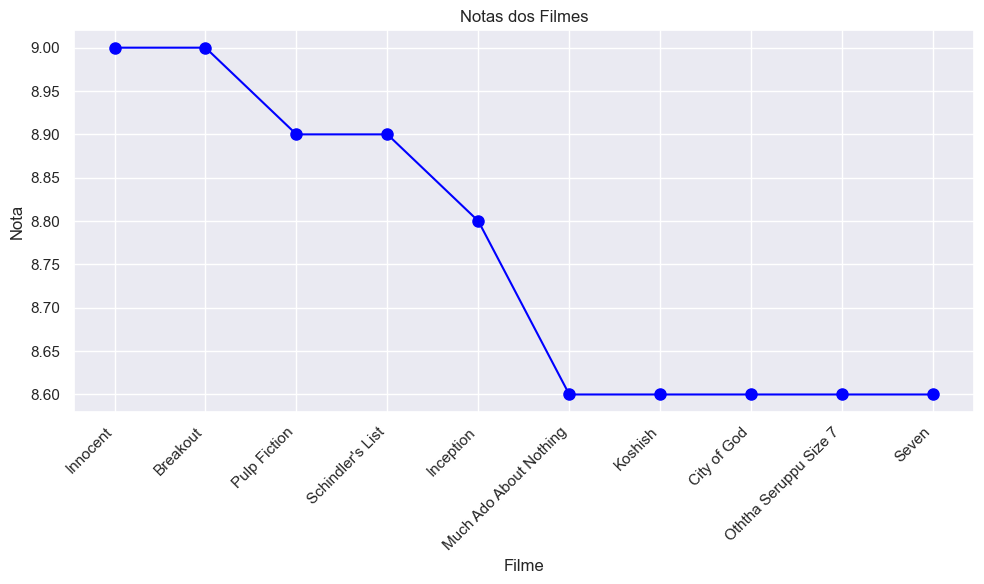

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import mplcursors  # Certifique-se de instalar com 'pip install mplcursors'





# Criar um gráfico de dispersão
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(top_rated['Title'], top_rated['Rating'], color='orange', marker='o')
ax.plot(top_rated['Title'], top_rated['Rating'], linestyle='-', color='blue', marker='o', markersize=8)
ax.set_xlabel('Filme')
ax.set_ylabel('Nota')
ax.set_title('Notas dos Filmes')
ax.set_xticklabels(top_rated['Title'], rotation=45, ha='right')  # Rotacionar os nomes dos filmes para melhor visualização

# Adicionar anotações interativas ao passar o mouse sobre os pontos
cursor = mplcursors.cursor(scatter, hover=True)
cursor.connect("add", lambda sel: sel.annotation.set_text(f"Nota: {sel.artist.get_offsets()[sel.target.index, 1]}"))

# Exibir o gráfico
plt.tight_layout()
plt.show()


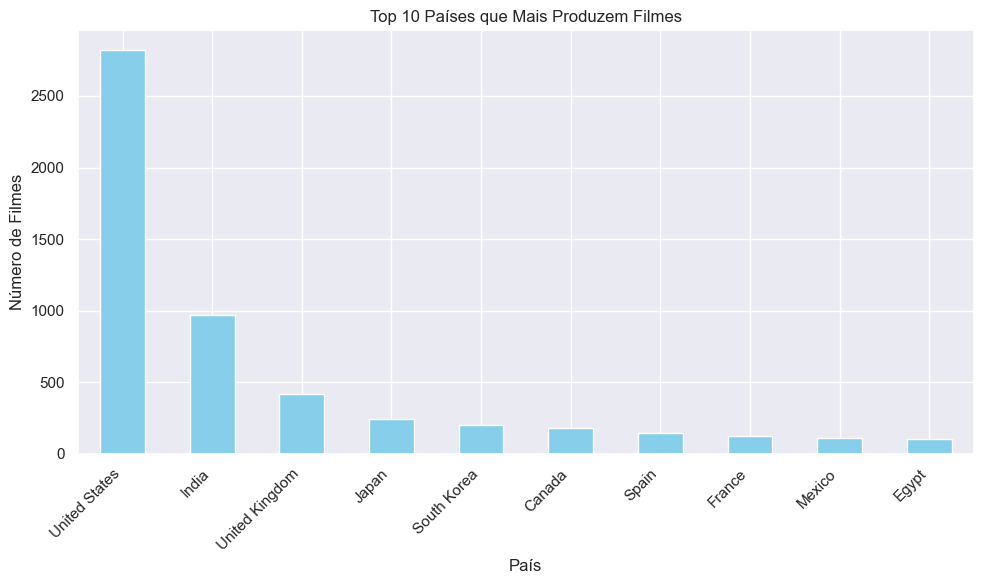

In [47]:
import matplotlib.pyplot as plt
import pandas as pd



# Contar o número de filmes por país
top_countries = df['country'].value_counts().head(10)

# Criar um gráfico de barras
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='skyblue')
plt.xlabel('País')
plt.ylabel('Número de Filmes')
plt.title('Top 10 Países que Mais Produzem Filmes')
plt.xticks(rotation=45, ha='right')  # Rotacionar os nomes dos países para melhor visualização
plt.tight_layout()

# Exibir o gráfico
plt.show()


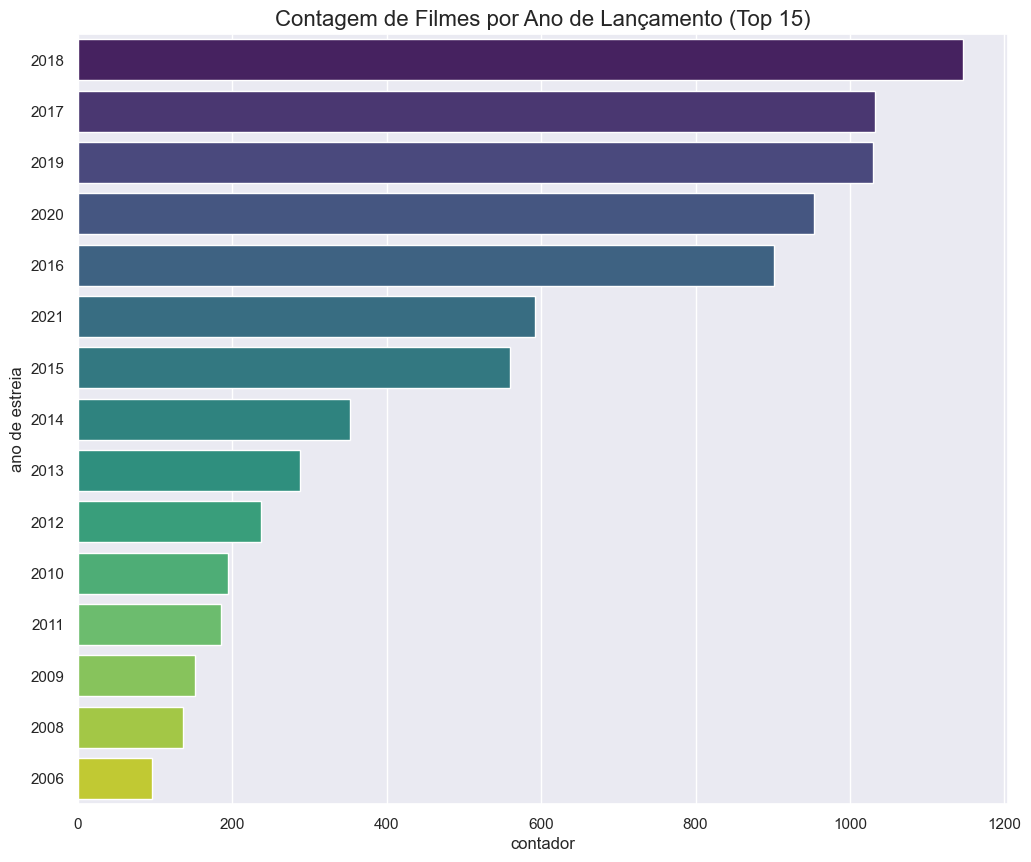

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.set(style="darkgrid")

ax = sns.countplot(y="release_year", data=df, order=df['release_year'].value_counts().index[0:15], palette="viridis")

# Adicionar título ao gráfico
ax.set_title('Contagem de Filmes por Ano de Lançamento (Top 15)', fontsize=16)
plt.ylabel("ano de estreia")
plt.xlabel("contador")

plt.show()


In [49]:
df.director.value_counts().head(10)

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64

In [50]:
df.listed_in.value_counts().head(10)

listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            220
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: count, dtype: int64

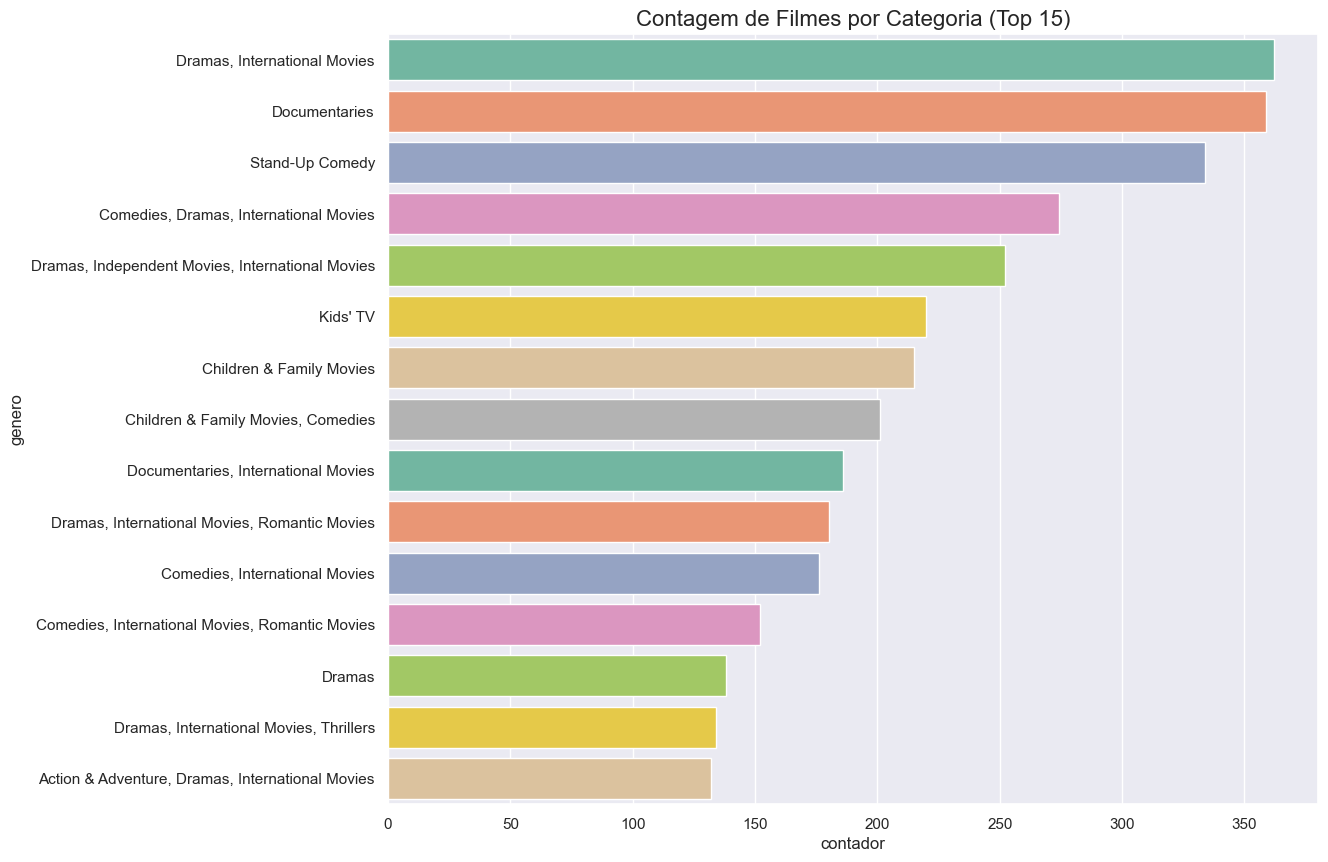

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.set(style="darkgrid")

ax = sns.countplot(y="listed_in", data=df, order=df['listed_in'].value_counts().index[0:15], palette="Set2")

# Adicionar título ao gráfico
ax.set_title('Contagem de Filmes por Categoria (Top 15)', fontsize=16)
plt.ylabel("genero")
plt.xlabel("contador")
plt.show()


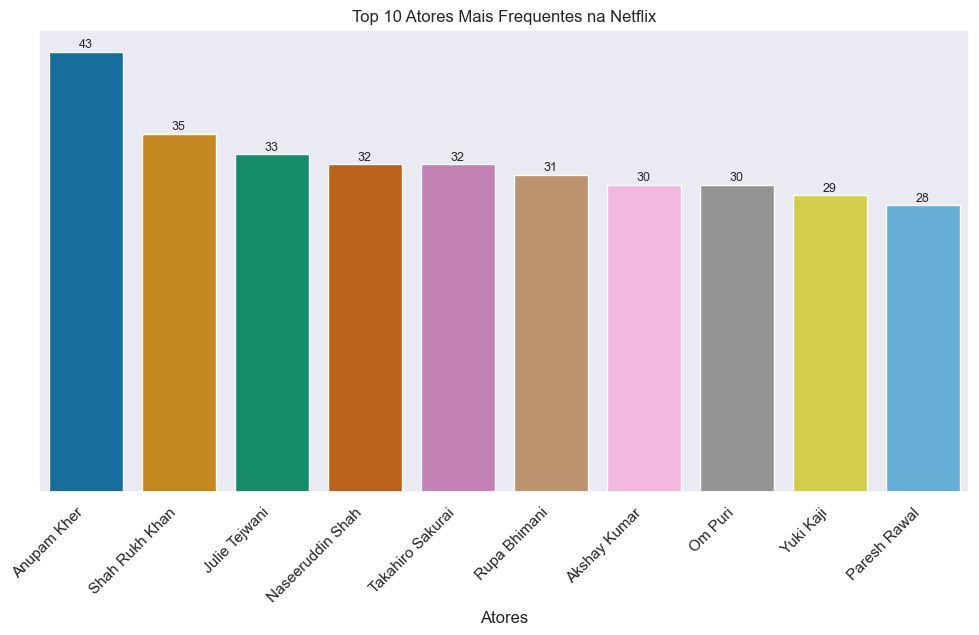

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

all_actors = [actor for sublist in df['cast'].dropna().str.split(', ') for actor in sublist]
# Crie uma tabela dinâmica para contar a frequência de cada ator
top_actors = pd.Series(all_actors).value_counts().head(10)

# Plote o gráfico de barras com a paleta "colorblind"
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=top_actors.index, y=top_actors.values, palette="colorblind")
plt.title('Top 10 Atores Mais Frequentes na Netflix')
plt.xlabel('Atores')
 

# Rotacionar os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45, ha='right')

# Adicionar rótulos com a quantidade exata de filmes ao lado das barras
for index, value in enumerate(top_actors.values):
    bar_plot.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=9)

# Remover rótulos no eixo y
plt.yticks([])

plt.show()



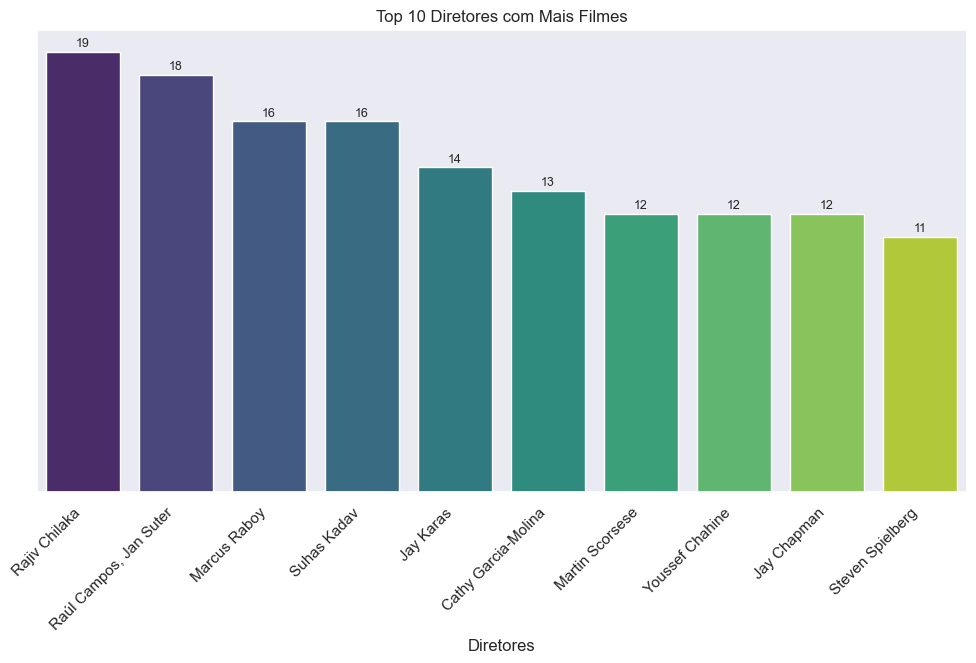

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



top_directors = df['director'].value_counts().head(10)

# Criar um gráfico de barras
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=top_directors.index, y=top_directors.values, palette="viridis")
plt.title('Top 10 Diretores com Mais Filmes')
plt.xlabel('Diretores')

# Rotacionar os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45, ha='right')

# Adicionar rótulos com a quantidade exata de filmes ao lado das barras
for index, value in enumerate(top_directors.values):
    bar_plot.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=9)

# Remover rótulos no eixo y
plt.yticks([])

plt.show()
